In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dosen = pd.read_csv('Dataset2_EvaluasiDosenPerMK.csv',sep=';')
dosen

,TAHUN,SEMESTER,MATAKULIAH,PERTANYAAN,KETERANGAN,NILAI
0,2015,1511,IS100 Management Information Systems,1,Kesiapan memberikan perkuliahan/praktikum,"3,28"
1,2015,1511,IS100 Management Information Systems,2,Upaya menyampaikan materi perkuliahan/praktik...,"3,25"
2,2015,1511,IS100 Management Information Systems,3,Sistematis dalam menyampaikan materi perkuliah...,"3,24"
3,2015,1511,IS100 Management Information Systems,4,Kemampuan memberikan contoh yang relevan dari ...,"3,30"
4,2015,1511,IS100 Management Information Systems,5,Penyampaian materi perkuliahan sesuai dengan k...,"3,27"
...,...,...,...,...,...,...
2109,2018,1821,IS726 Innovation in Information and Technology,10,Pemberian tugas/kuis serta pembahasannya di kelas,"3,45"
2110,2018,1821,IS726 Innovation in Information and Technology,11,Kemampuan memotivasi semangat belajar mahasiswa,"3,41"
2111,2018,1821,IS726 Innovation in Information and Technology,12,"Kemampuan menerima kritik, saran dan pendapat","3,48"
2112,2018,1821,IS726 Innovation in Information and Technology,13,Fairness dalam memberikan penilaian,"3,49"


In [3]:
dosen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2114 entries, 0 to 2113
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TAHUN       2114 non-null   int64 
 1   SEMESTER    2114 non-null   int64 
 2   MATAKULIAH  2114 non-null   object
 3   PERTANYAAN  2114 non-null   int64 
 4   KETERANGAN  2114 non-null   object
 5   NILAI       2114 non-null   object
dtypes: int64(3), object(3)
memory usage: 99.2+ KB


TAHUN         0
SEMESTER      0
MATAKULIAH    0
PERTANYAAN    0
KETERANGAN    0
NILAI         0
dtype: int64

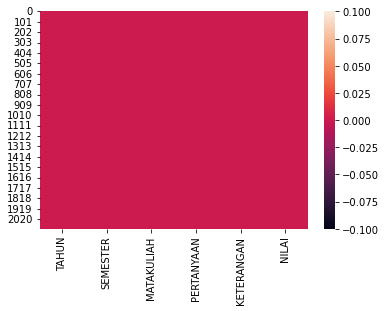

In [4]:
sns.heatmap(dosen.isna())
dosen.isnull().sum(axis = 0)

In [5]:
### merubah tipe data nilai menjadi integer
dosen['NILAI'] = dosen['NILAI'].replace(',','.',regex=True)
dosen['NILAI'] = dosen['NILAI'].astype('float')
dosen

,TAHUN,SEMESTER,MATAKULIAH,PERTANYAAN,KETERANGAN,NILAI
0,2015,1511,IS100 Management Information Systems,1,Kesiapan memberikan perkuliahan/praktikum,3.28
1,2015,1511,IS100 Management Information Systems,2,Upaya menyampaikan materi perkuliahan/praktik...,3.25
2,2015,1511,IS100 Management Information Systems,3,Sistematis dalam menyampaikan materi perkuliah...,3.24
3,2015,1511,IS100 Management Information Systems,4,Kemampuan memberikan contoh yang relevan dari ...,3.30
4,2015,1511,IS100 Management Information Systems,5,Penyampaian materi perkuliahan sesuai dengan k...,3.27
...,...,...,...,...,...,...
2109,2018,1821,IS726 Innovation in Information and Technology,10,Pemberian tugas/kuis serta pembahasannya di kelas,3.45
2110,2018,1821,IS726 Innovation in Information and Technology,11,Kemampuan memotivasi semangat belajar mahasiswa,3.41
2111,2018,1821,IS726 Innovation in Information and Technology,12,"Kemampuan menerima kritik, saran dan pendapat",3.48
2112,2018,1821,IS726 Innovation in Information and Technology,13,Fairness dalam memberikan penilaian,3.49


In [6]:
dosen['KODEKULIAH'] = dosen['MATAKULIAH'].str[:6]
dosen['MATAKULIAH'] = dosen['MATAKULIAH'].str[6:]
dosen

,TAHUN,SEMESTER,MATAKULIAH,PERTANYAAN,KETERANGAN,NILAI,KODEKULIAH
0,2015,1511,Management Information Systems,1,Kesiapan memberikan perkuliahan/praktikum,3.28,IS100
1,2015,1511,Management Information Systems,2,Upaya menyampaikan materi perkuliahan/praktik...,3.25,IS100
2,2015,1511,Management Information Systems,3,Sistematis dalam menyampaikan materi perkuliah...,3.24,IS100
3,2015,1511,Management Information Systems,4,Kemampuan memberikan contoh yang relevan dari ...,3.30,IS100
4,2015,1511,Management Information Systems,5,Penyampaian materi perkuliahan sesuai dengan k...,3.27,IS100
...,...,...,...,...,...,...,...
2109,2018,1821,Innovation in Information and Technology,10,Pemberian tugas/kuis serta pembahasannya di kelas,3.45,IS726
2110,2018,1821,Innovation in Information and Technology,11,Kemampuan memotivasi semangat belajar mahasiswa,3.41,IS726
2111,2018,1821,Innovation in Information and Technology,12,"Kemampuan menerima kritik, saran dan pendapat",3.48,IS726
2112,2018,1821,Innovation in Information and Technology,13,Fairness dalam memberikan penilaian,3.49,IS726


<AxesSubplot:xlabel='TAHUN', ylabel='MATAKULIAH'>

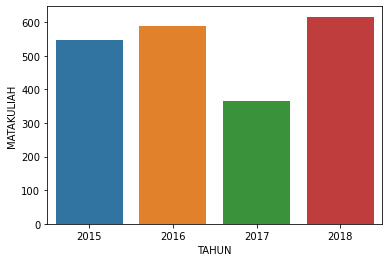

In [7]:
### ada berapa mata kuliah setiap tahunnya
filter = dosen.groupby('TAHUN',as_index=False).agg({'MATAKULIAH':'count'})
sns.barplot(x='TAHUN',y='MATAKULIAH',data=filter)

In [8]:
filter = dosen.groupby(['TAHUN','MATAKULIAH'],as_index=False).agg({'NILAI':'mean'})
filter

,TAHUN,MATAKULIAH,NILAI
0,2015,Advanced Database,3.302857
1,2015,Advanced IS Analysis & Design,3.196071
2,2015,Algorithms and Programming,3.129286
3,2015,Business Ethics and Law,3.167143
4,2015,Business Mathematics,3.087143
...,...,...,...
134,2018,Probability and Statistic,3.143571
135,2018,Seminars on Information Systems,3.545000
136,2018,Supply Chain Management,3.542857
137,2018,Visual Programming,3.121429


In [9]:
filter = dosen.groupby(['MATAKULIAH'],as_index=False).agg({'NILAI':'mean'})
filter

,MATAKULIAH,NILAI
0,Advanced Database,3.344643
1,Advanced IS Analysis & Design,3.185857
2,Algorithm and Data Structure,2.657857
3,Algorithms and Programming,3.164464
4,Big Data Analytics 1,3.532143
5,Big Data Analytics 2,3.482143
6,Business Ethics and Law,3.290476
7,Business Intelligence,3.361429
8,Business Mathematics,3.079286
9,Corporate Business Processes,3.292959


3.312979371818658


,TAHUN,NILAI
0,2015,3.269231
1,2016,3.267432
2,2017,3.363956
3,2018,3.351299


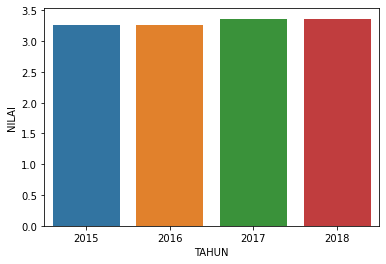

In [10]:
### rerata evaluasi pertahun
filter = dosen.groupby('TAHUN',as_index=False).agg({'NILAI':'mean'})
sns.barplot(x='TAHUN',y='NILAI',data=filter)
print(filter.NILAI.mean())
filter

In [11]:
dosen.KETERANGAN.value_counts()

Kesiapan memberikan perkuliahan/praktikum                                                             151
Upaya  menyampaikan materi perkuliahan/praktikum dengan jelas                                         151
Sistematis dalam menyampaikan materi perkuliahan/praktikum                                            151
Kemampuan memberikan contoh yang relevan dari materi yang diajarkan                                   151
Penyampaian materi perkuliahan sesuai dengan kontrak perkuliahan                                      151
Pemakaian buku teks sebagai buku utama perkuliahan                                                    151
Memberi review materi  perkuliahan sebelumnya                                                         151
Pemberian kesempatan bertanya, berdiskusi serta berkonsultasi (baik di dalam maupun di luar kelas)    151
Kejelasan menjawab pertanyaan /diskusi di kelas                                                       151
Pemberian tugas/kuis serta pembahasannya di ke

In [12]:
dosen

,TAHUN,SEMESTER,MATAKULIAH,PERTANYAAN,KETERANGAN,NILAI,KODEKULIAH
0,2015,1511,Management Information Systems,1,Kesiapan memberikan perkuliahan/praktikum,3.28,IS100
1,2015,1511,Management Information Systems,2,Upaya menyampaikan materi perkuliahan/praktik...,3.25,IS100
2,2015,1511,Management Information Systems,3,Sistematis dalam menyampaikan materi perkuliah...,3.24,IS100
3,2015,1511,Management Information Systems,4,Kemampuan memberikan contoh yang relevan dari ...,3.30,IS100
4,2015,1511,Management Information Systems,5,Penyampaian materi perkuliahan sesuai dengan k...,3.27,IS100
...,...,...,...,...,...,...,...
2109,2018,1821,Innovation in Information and Technology,10,Pemberian tugas/kuis serta pembahasannya di kelas,3.45,IS726
2110,2018,1821,Innovation in Information and Technology,11,Kemampuan memotivasi semangat belajar mahasiswa,3.41,IS726
2111,2018,1821,Innovation in Information and Technology,12,"Kemampuan menerima kritik, saran dan pendapat",3.48,IS726
2112,2018,1821,Innovation in Information and Technology,13,Fairness dalam memberikan penilaian,3.49,IS726


In [49]:
survey_kualitas = dosen.pivot_table(index=['MATAKULIAH','TAHUN','KODEKULIAH'], columns='KETERANGAN', values='NILAI')
survey_kualitas.reset_index(inplace=True)
survey_kualitas['MEAN'] = survey_kualitas.loc[:,'Fairness dalam memberikan penilaian':].mean(axis=1)
survey_kualitas['KODEKULIAH']=survey_kualitas.KODEKULIAH.str.replace(' ','')
survey_kualitas.to_csv('survey_kualitas.csv',index=False)



In [52]:
survey_kualitas['MK_TAHUN'] = survey_kualitas['KODEKULIAH'] + survey_kualitas['TAHUN'].astype(str)
survey_kualitas

KETERANGAN,MATAKULIAH,TAHUN,KODEKULIAH,Fairness dalam memberikan penilaian,Kejelasan menjawab pertanyaan /diskusi di kelas,Kemampuan memberikan contoh yang relevan dari materi yang diajarkan,Kemampuan memotivasi semangat belajar mahasiswa,"Kemampuan menerima kritik, saran dan pendapat",Kesiapan memberikan perkuliahan/praktikum,Ketepatan waktu dalam memulai dan mengakhiri perkuliahan/praktikum,Memberi review materi perkuliahan sebelumnya,Pemakaian buku teks sebagai buku utama perkuliahan,"Pemberian kesempatan bertanya, berdiskusi serta berkonsultasi (baik di dalam maupun di luar kelas)",Pemberian tugas/kuis serta pembahasannya di kelas,Penyampaian materi perkuliahan sesuai dengan kontrak perkuliahan,Sistematis dalam menyampaikan materi perkuliahan/praktikum,Upaya menyampaikan materi perkuliahan/praktikum dengan jelas,MEAN,MK_TAHUN
0,Advanced Database,2015,IS544,3.290,3.28,3.280,3.230,3.280,3.290,3.350,3.260,3.340,3.340,3.35,3.340,3.330,3.280,3.302857,IS5442015
1,Advanced Database,2016,IS544,3.300,3.30,3.170,3.230,3.200,3.300,3.230,3.200,3.200,3.270,3.23,3.270,3.200,3.230,3.237857,IS5442016
2,Advanced Database,2017,IS544,3.500,3.38,3.380,3.380,3.380,3.380,3.380,3.380,3.500,3.500,3.50,3.380,3.500,3.500,3.431429,IS5442017
3,Advanced Database,2018,IS544,3.450,3.37,3.410,3.400,3.400,3.460,3.430,3.380,3.420,3.420,3.37,3.410,3.400,3.370,3.406429,IS5442018
4,Advanced IS Analysis & Design,2015,IS422,3.210,3.14,3.235,3.205,3.200,3.180,3.155,3.250,3.250,3.200,3.17,3.180,3.200,3.170,3.196071,IS4222015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Visual Programming,2016,IS431,2.250,2.25,2.250,2.170,2.330,2.170,2.420,2.330,2.330,2.420,2.50,2.420,2.250,2.170,2.304286,IS4312016
135,Visual Programming,2017,IS431,3.180,3.12,3.170,3.120,3.170,3.210,3.180,3.110,3.060,3.140,3.14,3.190,3.150,3.110,3.146429,IS4312017
136,Visual Programming,2018,IS431,3.190,3.10,3.090,3.070,3.120,3.140,3.160,3.120,3.110,3.130,3.13,3.130,3.140,3.070,3.121429,IS4312018
137,Web Design and Development,2018,IS556,3.125,3.22,3.220,3.115,3.175,3.275,3.295,3.145,3.145,3.235,3.19,3.265,3.245,3.215,3.204643,IS5562018


In [39]:
filter = survey_kualitas.KODEKULIAH.unique()

mahasiswa = pd.read_csv('Dataset1_TranscriptMahasiswa.csv',sep=';')
mahasiswa = mahasiswa[mahasiswa['ANGKATAN']>=2015]
data_mahasiswa = mahasiswa[mahasiswa['KODE_MK'].isin(filter)]
data_mahasiswa

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
17687,8429,2015,1511,IS100,Sistem Informasi Dalam Manajemen,3,100.0,A
17688,8429,2015,1511,IS110,Matematika Bisnis,3,85.0,A
17692,8429,2015,1521,IS220,Interaksi Manusia dan Komputer,3,80.0,A-
17693,8429,2015,1521,IS230,Algoritma dan Pemrograman,3,55.0,C
17694,8429,2015,1521,IS240,Probabilitas dan Statistik,3,86.0,A
...,...,...,...,...,...,...,...,...
30864,33849,2018,1821,IS201,Proses Bisnis Korporat,3,0.0,E
30865,33849,2018,1821,IS220,Interaksi Manusia dan Komputer,3,26.0,E
30866,33849,2018,1821,IS240,Probabilitas dan Statistik,3,38.0,E
30867,33849,2018,1821,IS251,Perilaku Organisasi,2,49.0,D


In [34]:
"""
I,J = data_mahasiswa.shape
for j in range(J):
    for i in range(I):
        if data_mahasiswa.iloc[i,j]!= np.nan:
            if data_mahasiswa.iloc[i,j]>=85:
                data_mahasiswa.iloc[i,j]=4
            elif data_mahasiswa.iloc[i,j]>=80:
                data_mahasiswa.iloc[i,j]=3.7
            elif data_mahasiswa.iloc[i,j]>=75:
                data_mahasiswa.iloc[i,j]=3.3
            elif data_mahasiswa.iloc[i,j]>=70:
                data_mahasiswa.iloc[i,j]=3.0
            elif data_mahasiswa.iloc[i,j]>=65:
                data_mahasiswa.iloc[i,j]=2.7
            elif data_mahasiswa.iloc[i,j]>=60:
                data_mahasiswa.iloc[i,j]=2.3
            elif data_mahasiswa.iloc[i,j]>=55:
                data_mahasiswa.iloc[i,j]=2
            elif data_mahasiswa.iloc[i,j]>=45:
                data_mahasiswa.iloc[i,j]=1
            elif data_mahasiswa.iloc[i,j]>=0:
                 data_mahasiswa.iloc[i,j]=1
        else:
            continue
        """

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


TypeError: '>=' not supported between instances of 'str' and 'int'

In [58]:
data_mahasiswa = data_mahasiswa.groupby(['KODE_MK','ANGKATAN'],as_index=False).agg({'NILAI':'mean'},inplace=True)
data_mahasiswa['MK_TAHUN'] = data_mahasiswa['KODE_MK'] + data_mahasiswa['ANGKATAN'].astype(str)
data_mahasiswa

,KODE_MK,ANGKATAN,NILAI,MK_TAHUN
0,IS100,2015,74.104167,IS1002015
1,IS100,2016,85.423529,IS1002016
2,IS100,2017,81.476636,IS1002017
3,IS100,2018,75.451389,IS1002018
4,IS110,2015,66.145833,IS1102015
...,...,...,...,...
111,IS726,2016,90.000000,IS7262016
112,IS747,2015,92.266667,IS7472015
113,IS749,2015,70.166667,IS7492015
114,IS773,2015,87.714286,IS7732015


In [63]:
survey_kualitas = survey_kualitas.join(data_mahasiswa.loc[:'NILAI'].set_index('MK_TAHUN'),on='MK_TAHUN',how='left')

In [64]:
survey_kualitas

,MATAKULIAH,TAHUN,KODEKULIAH,Fairness dalam memberikan penilaian,Kejelasan menjawab pertanyaan /diskusi di kelas,Kemampuan memberikan contoh yang relevan dari materi yang diajarkan,Kemampuan memotivasi semangat belajar mahasiswa,"Kemampuan menerima kritik, saran dan pendapat",Kesiapan memberikan perkuliahan/praktikum,Ketepatan waktu dalam memulai dan mengakhiri perkuliahan/praktikum,...,"Pemberian kesempatan bertanya, berdiskusi serta berkonsultasi (baik di dalam maupun di luar kelas)",Pemberian tugas/kuis serta pembahasannya di kelas,Penyampaian materi perkuliahan sesuai dengan kontrak perkuliahan,Sistematis dalam menyampaikan materi perkuliahan/praktikum,Upaya menyampaikan materi perkuliahan/praktikum dengan jelas,MEAN,MK_TAHUN,KODE_MK,ANGKATAN,NILAI
0,Advanced Database,2015,IS544,3.290,3.28,3.280,3.230,3.280,3.290,3.350,...,3.340,3.35,3.340,3.330,3.280,3.302857,IS5442015,IS544,2015.0,88.533333
1,Advanced Database,2016,IS544,3.300,3.30,3.170,3.230,3.200,3.300,3.230,...,3.270,3.23,3.270,3.200,3.230,3.237857,IS5442016,IS544,2016.0,79.571429
2,Advanced Database,2017,IS544,3.500,3.38,3.380,3.380,3.380,3.380,3.380,...,3.500,3.50,3.380,3.500,3.500,3.431429,IS5442017,NaN,NaN,NaN
3,Advanced Database,2018,IS544,3.450,3.37,3.410,3.400,3.400,3.460,3.430,...,3.420,3.37,3.410,3.400,3.370,3.406429,IS5442018,NaN,NaN,NaN
4,Advanced IS Analysis & Design,2015,IS422,3.210,3.14,3.235,3.205,3.200,3.180,3.155,...,3.200,3.17,3.180,3.200,3.170,3.196071,IS4222015,IS422,2015.0,81.478723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Visual Programming,2016,IS431,2.250,2.25,2.250,2.170,2.330,2.170,2.420,...,2.420,2.50,2.420,2.250,2.170,2.304286,IS4312016,IS431,2016.0,63.611940
135,Visual Programming,2017,IS431,3.180,3.12,3.170,3.120,3.170,3.210,3.180,...,3.140,3.14,3.190,3.150,3.110,3.146429,IS4312017,IS431,2017.0,64.063158
136,Visual Programming,2018,IS431,3.190,3.10,3.090,3.070,3.120,3.140,3.160,...,3.130,3.13,3.130,3.140,3.070,3.121429,IS4312018,NaN,NaN,NaN
137,Web Design and Development,2018,IS556,3.125,3.22,3.220,3.115,3.175,3.275,3.295,...,3.235,3.19,3.265,3.245,3.215,3.204643,IS5562018,NaN,NaN,NaN
